In [93]:
# Import package yang diperlukan
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# Mengambil data dengan API (sumber https://api.covid19api.com)
# Data yang diambil adalah data kasus terkonfirmasi Covid 19 di Indonesia
response = requests.get("https://api.covid19api.com/dayone/country/indonesia/status/confirmed")
text = json.dumps(response.json(), indent = 1)
print(response.status_code)
print(text)

200
[
 {
  "Country": "Indonesia",
  "CountryCode": "ID",
  "Province": "",
  "City": "",
  "CityCode": "",
  "Lat": "-0.79",
  "Lon": "113.92",
  "Cases": 2,
  "Status": "confirmed",
  "Date": "2020-03-02T00:00:00Z"
 },
 {
  "Country": "Indonesia",
  "CountryCode": "ID",
  "Province": "",
  "City": "",
  "CityCode": "",
  "Lat": "-0.79",
  "Lon": "113.92",
  "Cases": 2,
  "Status": "confirmed",
  "Date": "2020-03-03T00:00:00Z"
 },
 {
  "Country": "Indonesia",
  "CountryCode": "ID",
  "Province": "",
  "City": "",
  "CityCode": "",
  "Lat": "-0.79",
  "Lon": "113.92",
  "Cases": 2,
  "Status": "confirmed",
  "Date": "2020-03-04T00:00:00Z"
 },
 {
  "Country": "Indonesia",
  "CountryCode": "ID",
  "Province": "",
  "City": "",
  "CityCode": "",
  "Lat": "-0.79",
  "Lon": "113.92",
  "Cases": 2,
  "Status": "confirmed",
  "Date": "2020-03-05T00:00:00Z"
 },
 {
  "Country": "Indonesia",
  "CountryCode": "ID",
  "Province": "",
  "City": "",
  "CityCode": "",
  "Lat": "-0.79",
  "Lon": "113.

In [96]:
# Mengambil kolom "Date" dan "Cases", kemudian merapikannya dalam bentuk Data Frame
convert_json = json.loads(text)
data = pd.DataFrame(convert_json)
df = data[["Date","Cases"]]

# Mengambil data untuk tanggal 15 Desember 2021 - 15 Januari 2022
df = df[(df["Date"]>="2021-12-15") & (df["Date"]<="2022-01-16")]

# Mengubah type data pada kolom "Date" dan mereset index Data Frame
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.reset_index(drop=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    32 non-null     datetime64[ns]
 1   Cases   32 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 640.0 bytes


,Date,Cases
0,2021-12-15,4259644
1,2021-12-16,4259857
2,2021-12-17,4260148
3,2021-12-18,4260380
4,2021-12-19,4260544


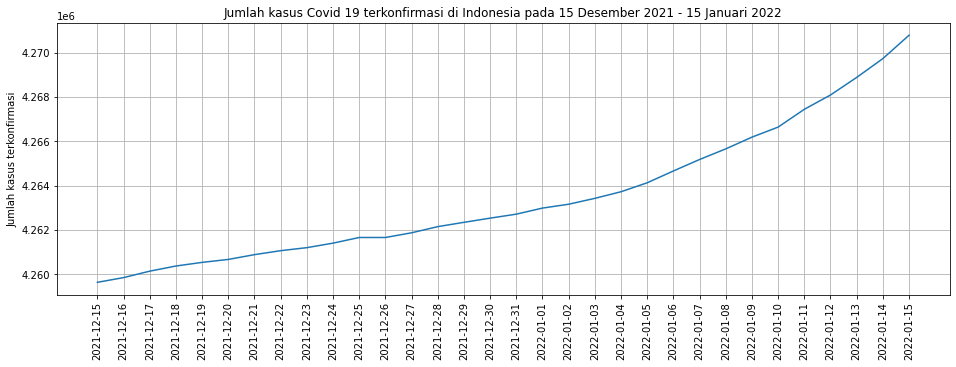

In [98]:
#Membuat plot untuk melihat fluktuasi atau perubahan
plt.figure(figsize=(16,5))
plt.plot_date(df["Date"], df["Cases"], fmt="-", xdate=True)
plt.grid()
plt.xticks(df["Date"], rotation=90)
plt.title("Jumlah kasus Covid 19 terkonfirmasi di Indonesia pada 15 Desember 2021 - 15 Januari 2022")
plt.ylabel("Jumlah kasus terkonfirmasi")
plt.show()

In [99]:
# Analisis
'''
Kasus Covid 19 di Indonesia mengalami kenaikan dari tanggal 15 Desember 2021
dengan jumlah kasus sebanyak 4,259,644 kasus sampai 15 Januari 2022 dengan
jumlah kasus sebanyak 4,270,794. Selama satu bulan terjadi kenaikan sebanyak
lebih dari 11,000 kasus. 

Kasus Covid 19 mengalami kenaikan yang signifikan terjadi pada tanggal 4 Januari
2022 sampai 15 Januari 2022 dengan jumlah kenaikan sebesar 7,062 kasus dalam 12
hari. Jumlah tersebut memberikan presentase sebesar 64% dari total kenaikan dari
15 Desember - 15 Januari. Hal ini bisa menjadi pertimbangan untuk mengetahui
penyebab terjadinya kenaikan jumlah kasus Covid 19 yang signifikan pada tanggal
4 - 15 Januari 2022.
'''

'\nKasus Covid 19 di Indonesia mengalami kenaikan dari tanggal 15 Desember 2021\ndengan jumlah kasus sebanyak 4,259,644 kasus sampai 15 Januari 2022 dengan\njumlah kasus sebanyak 4,270,794. Selama satu bulan terjadi kenaikan sebanyak\nlebih dari 11,000 kasus. \n\nKasus Covid 19 mengalami kenaikan yang signifikan terjadi pada tanggal 4 Januari\n2022 sampai 15 Januari 2022 dengan jumlah kenaikan sebesar 7,062 kasus dalam 12\nhari. Jumlah tersebut memberikan presentase sebesar 64% dari total kenaikan dari\n15 Desember - 15 Januari. Hal ini bisa menjadi pertimbangan untuk mengetahui\npenyebab terjadinya kenaikan jumlah kasus Covid 19 yang signifikan pada tanggal\n4 - 15 Januari 2022.\n'